In [69]:
import functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A string that contains one character for each starting five minutes of the sleep period, so that the first period starts from sleep.bedtime.start: - '1' = deep (N3) sleep - '2' = light (N1 or N2) sleep - '3' = REM sleep - '4' = awake

In [15]:
sleep_data, heart_data = functions.data_request(start = '2023-09-29', end = '2023-10-09')

In [24]:
sleep_data.json()['data'][0]['sleep_phase_5_min']

'44221211111124222222222242223333333224221222422224223333333322222222224223333443444422212222223333223222222422222333333332322222422422222233434'

In [77]:
hypno_str = sleep_data.json()['data'][0]['sleep_phase_5_min']
hypno = pd.Series([int(elem) for elem in hypno_str]).map({1: 3, 2: 2, 3: 1, 4: 0}).values
hypno

array([0, 0, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 3, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0])

In [87]:
sf_hypno=1 / 3000
bins = np.arange(hypno.size + 1) / (sf_hypno * 3600)

In [88]:
old_fontsize = plt.rcParams["font.size"]
plt.rcParams.update({"font.size": 18})

In [89]:
change_points = np.nonzero(np.ediff1d(hypno, to_end=1))
hypno = hypno[change_points]
bins = np.append(0, bins[change_points])

In [104]:
hypno

array([0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 1, 0, 2, 3, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0,
       2, 1, 0, 1, 0])

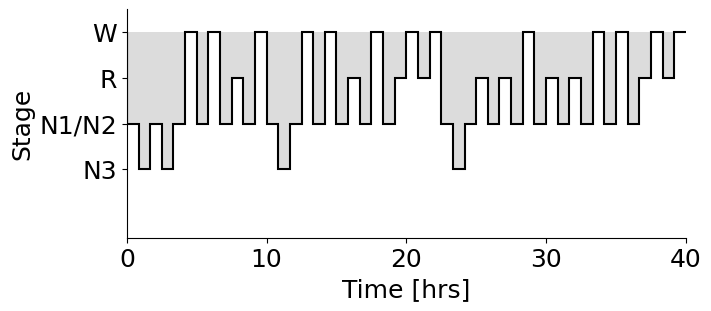

In [103]:
fill_color = "gainsboro"
lw = 1.5


fig, ax = plt.subplots(1, 1, figsize=(7, 3), constrained_layout=True)

# Start the plot
ax = plt.gca()
        
# Draw background filling
if fill_color is not None:
    ax.stairs(-1 * hypno.clip(0), bins, fill=True, color=fill_color, lw=0)
    
# Draw main hypnogram line
ax.stairs(-1 * hypno, bins, baseline=None, color="k", lw=lw)
    
# No artefacts or Unscored
ax.set_yticks([0, -1, -2, -3])
ax.set_yticklabels(["W", "R", "N1/N2", "N3"])
ax.set_ylim(-4.5, 0.5)
ax.set_xlim(0, bins.max())
ax.set_ylabel("Stage")
ax.set_xlabel("Time [hrs]")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# Revert font-size
plt.rcParams.update({"font.size": old_fontsize})